# Bài toán phân loại sử dụng Naive Bayes 

Mục tiêu: 

- Xây dựng được mô hình nb sử dụng thư viện sklearn. 
- Ứng dụng, hiểu cách áp dụng mô hình nb vào giải quyết bài toán thực tế (vd: phân loại văn bản) 
- Sử dụng độ đo Accuracy để làm độ đo đánh giá chất lượng mô hình. 

Vấn đề: 
- Có một tập các văn bản dạng text không có nhãn, làm sao để biết văn bản này là thuộc về thể loại nào, pháp luật, đời sống, văn học, thể thao ...
- => Xây dựng mô hình học máy có thể phân loại các thể loại của văn bản chỉ dựa trên nội dung.  

Dữ liệu: 
- Có tập các văn bản và nhãn tương ứng của từng văn bản trong một khoảng thời gian 
- Tập các nhãn - 10 nhãn văn bản: 
    > Giải trí, Khoa học - Công nghệ, Kinh tế, Pháp luật, Sức khỏe, Thể thao, Thời sự, Tin khác, Độc giả, Đời sống - Xã hội
- Ví dụ văn bản nhãn **thể thao**: 
    > "Dân_trí Real Madrid đã dẫn trước trong cả trận đấu , nhưng họ vẫn phải chấp_nhận bị Dortmund cầm hòa 2-2 ở Bernabeu . Real Madrid chấp_nhận đứng thứ_hai ở bảng F Champions League ..."

Bài toán: 
- Input: tập các từ trong văn bản 1 mẫu dữ liệu $X = [x_1, x_2, ... x_n]$
- Output: nhãn $y$ là 1 trong 10 nhãn trên 

# Nội dung thực hành

1. Nếu sử dụng GColab, cần kết nối với server và Gdrive(nếu sử dụng dữ liệu trong drive)

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# cd /content/drive/MyDrive/NB_practice/1. Practice

/content/drive/MyDrive/NB_practice/1. Practice


2. Import các thư viện cần thiết, cài thêm một số thư viện chưa sẵn có

In [11]:
# Cài đặt thư viện xử lý ngôn ngữ cho tiếng Việt!
!pip install pyvi

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#from sklearn.datasets import load_files
from pyvi import ViTokenizer # Tách từ tiếng Việt


import sklearn.naive_bayes as naive_bayes
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

%matplotlib inline

3. Load dữ liệu từ thư mục đã crawl từ trước 

>Cấu trúc thư mục như sau 
- data/news_1135/
    - Kinh tế: 
        - bài báo 1.txt 
        - bài báo 2.txt 
    - Pháp luật
        - bài báo 3.txt 
        - bài báo 4.txt 

In [10]:
data_train = load_files(container_path="data/news_1135/", encoding="utf-8")

print(data_train.filenames[0:3])
print()

print("Tong so file: {}" .format( len(data_train.filenames)))
print("Danh sách 10 nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names[0:10])] )


['data/news_1135/Thể thao/2e62de81ade8318f66cc740f5ede5607ea1bf002.txt'
 'data/news_1135/Thể thao/f9bd156031140a7db52ae51de4561f234a0eb277.txt'
 'data/news_1135/Thể thao/aeeb3b3b0dfc936de928f0b004259aca70aa4efa.txt']

Tong so file: 224
Danh sách 10 nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự')]


In [55]:
### bài tập ### 
# yêu cầu: Hiển thị nội dung, và nhãn của văn bản đầu tiên trong tập train. 
# gợi ý: tự làm.  
###############
# code 
# print(data_train.target_names[0]) #list of folders, not relevant to idx of training set
idx = data_train.target[0]
name = data_train.target_names[idx]
print(idx, name)
print(data_train.data[0])
###############

5 Thể thao
Dân_trí Sáng 5/12 , giải quần_vợt các tay_vợt xuất_sắc Việt_Nam - Cúp Vietravel 2016 đã chính_thức khai_mạc tại TP Vinh - Nghệ_An . Tham_dự giải hơn 30 tay_vợt xuất_sắc nhất của Liên_đoàn quần_vợt Việt_Nam . Dự lễ khai_mạc có ông Nguyễn Trọng Hổ - Vụ_trưởng Vụ thể_thao thành_tích cao II ; Đoàn Quốc Cường - Trưởng bộ_môn quần_vợt Liên_đoàn quần_vợt Việt_Nam ; Nguyễn Quốc Kỳ - Tổng_Giám_đốc Viettravel , Phó_Chủ_tịch kiêm Tổng_thư_ký Liên_đoàn quần_vợt Việt_Nam cùng lãnh_đạo tỉnh Nghệ_An . Giải quần_vợt các cây_vợt xuất_sắc Việt_Nam - Cup Vietravel 2016 do Liên_đoàn Quần_vợt Việt_Nam VTF phối_hợp với Sở VH - TT - DL và Liên_đoàn quần_vợt Nghệ_An NTF tổ_chức ; là giải đấu chuyên_nghiệp quốc_gia lần đầu_tiên được tổ_chức tại Nghệ_An . Ông Nguyễn Quốc Kỳ - PCT kiêm TTK Liên_đoàn quần_vợt Việt_Nam Tham_gia giải lần này có 22 VĐV nam , 9 VĐV nữ có điểm xếp_hạng cao nhất của bộ_môn quần_vợt chuyên_nghiệp , đến từ các trung_tâm quần_vợt lớn trong cả nước như : Thành_phố Hồ Chí Minh ; 

##  Tiền xử lý dữ liệu đưa dữ liệu từ dạng text về dạng ma trận 

- Thử nghiệm để kiểm tra hoạt động chuyển hoá dữ liệu về dạng ma trận 

In [45]:
# load dữ liệu các stopwords 
with open("data/vietnamese-stopwords.txt",encoding="utf8") as f:
    stopwords = f.readlines()
stopwords = [x.strip().replace(" ", "_") for x in stopwords]
print("Danh sách 10 từ dừng đầu tiên (từ không mang ý nghĩa phân loại): ", stopwords[:10])
print()

# 
# Transforming data 
# Chuyển hoá dữ liệu text về dạng vector tfidf 
#     - loại bỏ từ dừng
#     - sinh từ điển
module_count_vector = CountVectorizer(stop_words=stopwords)
### Build dictionary of vocab =  (word->id)
model_rf_preprocess = Pipeline([('vect', module_count_vector),
                    ('tfidf', TfidfTransformer()),
                    ])
### Chuẩn hóa data_bow theo trọng số TF-IDF (TF(t,d) ~ data_bow; IDF(t) = log(num of docs/num of docs include t)
### Xuất hiện nhiều trong văn bản d  -> TF cao. Xuất hiện ít trong toàn bộ tập văn bản -> IDF cao
# Hàm thực hiện chuyển đổi dữ liệu text thành dữ liệu số dạng ma trận 
# Input: Dữ liệu 2 chiều dạng numpy.array, mảng nhãn id dạng numpy.array 

# Tiền xử lý với Bag of words
data_bow = module_count_vector.fit_transform(data_train.data, data_train.target) #not need data_train.target
print(len(module_count_vector.vocabulary_))
print(f'Num of samples: {data_bow.shape[0]}, Num of vocab: {data_bow.shape[1]}')
### data_bow sẽ lưu các dòng là idx các văn bản, còn các cột thì sẽ có index ứng với id của words, và 1 ô sẽ lưu tần suất xuất hiện của từ tương ứng trong văn bản

# Tiền xử lý với TF-IDF
data_tfidf = model_rf_preprocess.fit_transform(data_train.data, data_train.target)

print("\n10 từ đầu tiên trong từ điển:\n")
i = 0
for k,v in module_count_vector.vocabulary_.items():
    i+=1
    print(i, ": ", (k, v))
    if i > 10:
        break 
print()

Danh sách 10 từ dừng đầu tiên (từ không mang ý nghĩa phân loại):  ['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']

7972
Num of samples: 224, Num of vocab: 7972

10 từ đầu tiên trong từ điển:

1 :  ('dân_trí', 1910)
2 :  ('12', 31)
3 :  ('giải', 2248)
4 :  ('quần_vợt', 5047)
5 :  ('tay_vợt', 5655)
6 :  ('xuất_sắc', 7201)
7 :  ('việt_nam', 6947)
8 :  ('cúp', 1574)
9 :  ('vietravel', 6912)
10 :  ('2016', 124)
11 :  ('chính_thức', 1196)



## Chia dữ liệu làm 2 phần training và testing 

- Training chiếm 80 % dữ liệu 
- Testing chiếm 20 % dữ liệu 

In [46]:
from sklearn.model_selection import train_test_split

# chia dữ liệu thành 2 phần sử dụng hàm train_test_split.
test_size = 0.2
# Bow
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(data_bow, data_train.target, test_size=test_size, random_state=30)
# Tf-idf
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(data_tfidf, data_train.target, test_size=test_size, random_state=30)


# hiển thị một số thông tin về dữ liệu 
print("Dữ liệu training = ", X_train_bow.shape, y_train_bow.shape)
print("Dữ liệu testing = ", X_test_bow.shape, y_test_bow.shape)

print() 
print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)] )

Dữ liệu training =  (179, 7972) (179,)
Dữ liệu testing =  (45, 7972) (45,)

Danh sách nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự')]


In [57]:
### bài tập ### 
# yêu cầu: Hiển thị ra id, tên nhãn của 5 văn bản đầu tiên trong tập train. 
# gợi ý: lấy dữ liệu id từ biến y_train, mapping với thứ tự nằm trong mảng data_train.target_names
###############
# code 
id5 = y_train_bow[:5]
name5 = [data_train.target_names[i] for i in id5]

for i in range(5):
    print(f'id: {id5[i]} -> name: {name5[i]}')

###############

id: 5 -> name: Thể thao
id: 5 -> name: Thể thao
id: 4 -> name: Sức khỏe
id: 6 -> name: Thời sự
id: 5 -> name: Thể thao


## Training Naive Bayes model 

Sử dụng thư viện sklearn để xây dựng 2 mô hình 
- `naive_bayes.MultinomialNB(alpha= 0.1)`: giá trị làm mịn alpha= 0.1
- `naive_bayes.GaussianNB()`

### Multinomial Naive Bayes
- Sử dụng Bag of words

In [59]:
print("- Training ...")


# X_train.shape
print("- Train size = {}".format(X_train_bow.shape))
model_MNB = naive_bayes.MultinomialNB(alpha= 0.1)
model_MNB.fit(X_train_bow, y_train_bow)
#learn P(C), P(word|C)  -> P(C|Doc_input) ~ P(Doc_input|C)*P(C) #argmax(C), MAP
# P(Doc_input|C) = (productRule) P(w1|C) * P(w2|C) * ... * P(wn|C)

#P(C) = (num of class C Docs)/(num of Docs)
#P(w|C) = {(nums w in class C) + alpha} / {total words in class C + alpha * |Vocab|}
print("- model_MNB - train complete")


- Training ...
- Train size = (179, 7972)
- model_MNB - train complete


    ### 2.2. Gaussian Naive Bayes
- Sử dụng TF-IDF

In [61]:
### bài tập ### 
# yêu cầu: huấn luyện một mô hình Gaussian Naive Bayes tương tự như trên
# gợi ý: naive_bayes.GaussianNB(var_smoothing=1e-3)
###############
# code 
model_GNB = naive_bayes.GaussianNB(var_smoothing=1e-3) #sigma^2 = sigma^2 + var_sm -> avoid divide 0
model_GNB.fit(X_train_tfidf.toarray(), y_train_tfidf)
#learn muy and sigma -> P(word|C) ~ Gaussian
#######################

,priors,None
,var_smoothing,0.001


## Testing Naive Bayes model 


Thực hiện dự đoán nhãn cho từng văn bản trong tập test 

Độ đo đánh giá: 
> accuracy = tổng số văn bản dự đoán đúng  / tổng số văn bản có trong tập test  

In [82]:
# Sử dụng thư viện tính accuracy_score trong sklearn
from sklearn.metrics import accuracy_score

In [63]:
print("- Testing ...")
y_pred_bow = model_MNB.predict(X_test_bow)
print("- Acc = {}".format(accuracy_score(y_test_bow, y_pred_bow)))

- Testing ...
- Acc = 0.9555555555555556


In [106]:
#Test tương tự cho GNB?

###code
print(type(X_test_tfidf))
print(type(y_test_tfidf))
print(type(X_test_tfidf.toarray()))

y_pred_tfidf = model_GNB.predict(X_test_tfidf.toarray())
print(f'- Acc = {accuracy_score(y_test_tfidf, y_pred_tfidf)}')

##########

<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
- Acc = 0.9555555555555556


## 5. Thực hiện sử dụng model đã được train để infer 1 văn bản mới 
- Dữ liệu mới đến ở dạng dữ liệu thô => cần tiền xử lý dữ liệu về dạng dữ_liệu_ma_trận
- infer sử dụng hàm model.predict(dữ_liệu_ma_trận) 

In [65]:
a = ViTokenizer.tokenize("Trường đại học bách khoa hà nội")
print(a)

Trường đại_học bách_khoa hà_nội


In [66]:
# tiền xử lý dữ liệu sử dụng module module_count_vector. 
van_ban_moi = ViTokenizer.tokenize("Công Phượng ghi bàn cho đội tuyển Việt Nam")
#van_ban_moi = ["Công_phượng ghi_bàn cho đội_tuyển Việt_nam"]
print(van_ban_moi)
input_data_preprocessed = module_count_vector.transform([van_ban_moi])
print(input_data_preprocessed)

print()
print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)] )



Công Phượng ghi_bàn cho đội_tuyển Việt_Nam
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (1, 7972)>
  Coords	Values
  (0, 1538)	1
  (0, 2177)	1
  (0, 4837)	1
  (0, 6947)	1
  (0, 7877)	1

Danh sách nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự')]


In [98]:
### bài tập ### 
# yêu cầu: dự đoán nhãn của 1 văn bản mới. Sử dụng mô hình Multinomial NB
# gợi ý: thực hiện code suy diễn mô hình từ tiền xử lý (bước 1) => infer (bước 4). (Chú ý: không training lại - ko gọi lại hàm fit.)  
###############
# code 
y_pred_ = model_MNB.predict(input_data_preprocessed)
print(y_pred_)
print(data_train.target_names[y_pred_[0]])

print("--")
input_data_tfidf = model_rf_preprocess.transform([van_ban_moi])
y_pred_2 = model_GNB.predict(input_data_tfidf.toarray())
print(y_pred_2)
print(data_train.target_names[y_pred_2[0]])

print("--")
y_pred3 = model_MNB.predict(input_data_tfidf)
print(y_pred3)
###############

[5]
Thể thao
--
[5]
Thể thao
--
[5]


## Quan sát độ chính xác trên tập test của GNB khi thay đổi tham số var_smoothing

In [135]:
var_smoothings = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 100]
accs = []
print(y_test_tfidf[:25])
for var_smoothing in var_smoothings:
    model_GNB = naive_bayes.GaussianNB(var_smoothing=var_smoothing)
    model_GNB.fit(X_train_tfidf.toarray(), y_train_tfidf)

    #Hoàn thiện thêm phần code ở đây để ghi nhận acc tương ứng trong từng trường hợp

    y_pred = model_GNB.predict(X_test_tfidf.toarray())
    acc = accuracy_score(y_test_tfidf, y_pred)
    accs.append(acc)
    print(y_pred[:25])


print("----------")
for i in range(len(accs)):
  print(var_smoothings[i], accs[i])

[4 4 4 5 5 5 5 4 5 5 5 5 5 5 5 5 4 5 5 4 6 5 5 4 5]
[4 4 6 5 5 5 5 4 6 5 5 5 5 5 5 5 4 5 5 4 6 5 5 6 5]
[4 4 4 5 5 5 5 4 5 5 5 5 5 5 5 5 4 5 5 4 6 5 5 4 5]
[4 4 4 5 5 5 5 4 5 5 5 5 5 5 5 5 4 5 5 4 6 5 5 4 5]
[4 4 4 5 5 5 5 4 5 5 5 5 5 5 5 5 4 5 5 4 5 5 5 4 5]
[4 4 4 5 5 5 5 4 5 5 5 5 5 5 5 5 4 5 5 4 5 5 5 4 5]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
----------
0.1 0.8666666666666667
0.01 0.9555555555555556
0.001 0.9555555555555556
0.0001 0.9333333333333333
1e-05 0.9333333333333333
100 0.6444444444444445


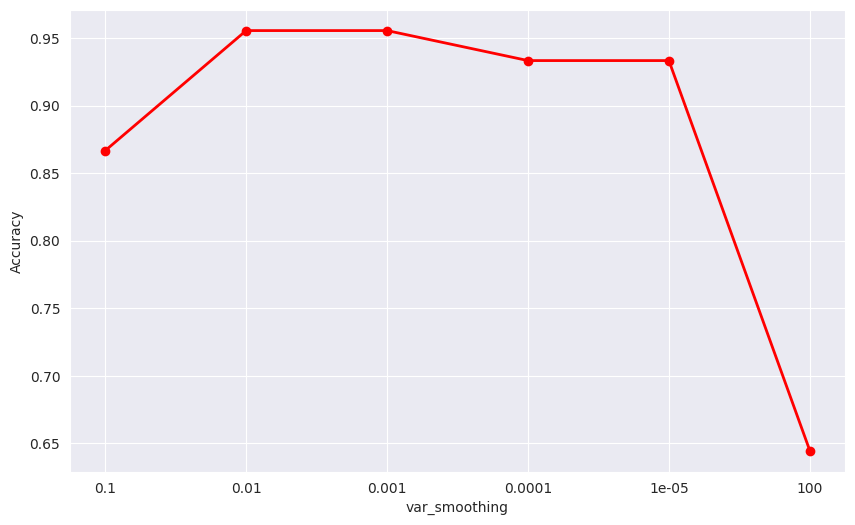

In [134]:
# Vẽ barplot + lineplot
plt.figure(figsize=(10,6))
x = np.arange(len(var_smoothings))

plt.plot(x, accs, marker="o", color="red", linewidth=2)
plt.xticks(x, [str(v) for v in var_smoothings])
plt.xlabel("var_smoothing")
plt.ylabel("Accuracy")
plt.show()

#### Với nhãn 5 chiếm đa số, thì khi var_smooth quá nhỏ thì sigma_5 ~ 0 -> xác suất rơi vào 5 lớn
#### khi var_smooth lớn thì phân phối Gauss bị bẹt -> phụ thuộc chủ yếu vào P(C) -> 5 lớn nhất